# Exploration du fichier source 'title.basics.tsv'

# Étape 1 : Préparation et Importation des Données

In [15]:
# 1. Importer les bibliothèques nécessaires 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# 2. Charger le fichier TSV

df_title_basics = pd.read_csv("C:/Users/vieas/Documents/GitHub/Movie-recommendation-project/gitignore/title.basics.tsv",sep='\t')

C:\Users\vieas\AppData\Local\Temp\ipykernel_8348\1707099459.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_title_basics = pd.read_csv("C:/Users/vieas/Documents/GitHub/Movie-recommendation-project/gitignore/title.basics.tsv",sep='\t')


In [31]:
df_title_basics_copy = df_title_basics.copy()

In [8]:
# 3. Aperçu initial des données :

print(df_title_basics.info())  # Donne des informations sur les types de colonnes et les valeurs manquantes
print(df_title_basics.describe())  # Statistiques descriptives basiques (numériques uniquement)

print("Aperçu des premières lignes :")
print(df_title_basics.head())

print("Aperçu des dernières lignes :")
print(df_title_basics.tail())

print("Aperçu de lignes au hasard :")
print(df_title_basics.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11248099 entries, 0 to 11248098
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 772.3+ MB
None
           tconst  titleType  primaryTitle originalTitle   isAdult startYear  \
count    11248099   11248099      11248080      11248080  11248099  11248099   
unique   11248099         11       5048924       5073560        44       152   
top     tt0000001  tvEpisode  Episode #1.1  Episode #1.1         0        \N   
freq            1    8640119         53438         53438  10822407   1417048   

         endYear runtimeMinutes    genres  
count   11248099       11248099  11247466  
unique        98            944      2384 

# Étape 2 : Inspection des Données

In [9]:
# 1. Vérification des dimensions :

print(df_title_basics.shape)  # Nombre de lignes et de colonnes

(11248099, 9)


Valeurs manquantes par colonne :
tconst                   0
titleType                0
primaryTitle            19
originalTitle           19
isAdult                  0
startYear          1417048
endYear           11115882
runtimeMinutes     7701255
genres                   0
dtype: int64


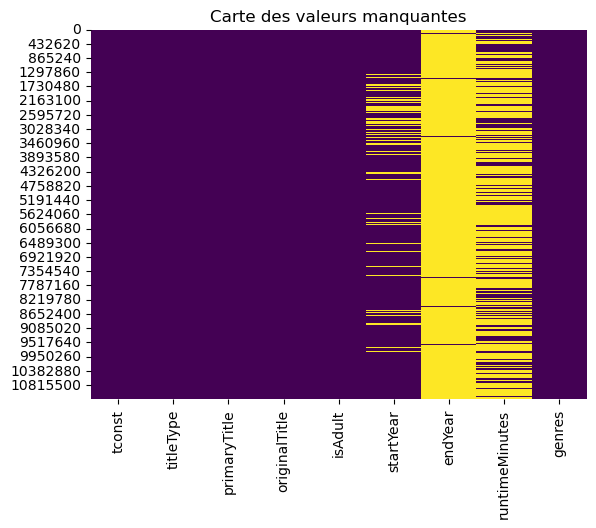

In [ ]:
# 2. Identifier les valeurs manquantes

missing_values = df_title_basics.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values)

# Visualisation des valeurs manquantes : NE FONCTIONNE PAS A MODIFIER
sns.heatmap(df_title_basics.isnull(), cbar=False, cmap='viridis')
plt.title("Carte des valeurs manquantes")
plt.show()


In [12]:
# 3. Identification des doublons :

print(df_title_basics.duplicated().sum())  # Nombre de lignes dupliquées

0


In [34]:
# 4. Vérifier les types de données et informations globales

print(df_title_basics.info())  # Types de données, valeurs non nulles
print(df_title_basics.describe(include='all'))  # Statistiques générales pour toutes les colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11248099 entries, 0 to 11248098
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 772.3+ MB
None
           tconst  titleType  primaryTitle originalTitle   isAdult startYear  \
count    11248099   11248099      11248080      11248080  11248099  11248099   
unique   11248099         11       5048924       5073560        44       152   
top     tt0000001  tvEpisode  Episode #1.1  Episode #1.1         0        \N   
freq            1    8640119         53438         53438  10822407   1417048   

         endYear runtimeMinutes    genres  
count   11248099       11248099  11247466  
unique        98            944      2384 

In [34]:
# regarder combien de lignes ont une donnée abérante dans 'isAdult' ? 
df_title_basics["isAdult"].unique()
df_title_basics["isAdult"].value_counts()

isAdult
0       10822407
1         359524
0          63526
1           2009
1985          79
1980          63
1978          54
1984          41
1974          32
1982          32
1972          29
2015          28
1983          25
2016          21
1977          20
1976          18
1975          18
1973          18
1981          18
1986          17
2017          17
1987          13
1979          13
2020           9
2018           9
2013           8
2019           7
2023           7
2014           6
1966           5
1988           5
2024           4
1968           3
2022           2
1970           2
1971           2
1969           1
1967           1
1964           1
\N             1
2012           1
2021           1
2011           1
2005           1
Name: count, dtype: int64

## Actions à mener sur les formats de colonnes

| #   | Column     | Dtype | Conclusion                                     |
| --- | ---------- | ----- | ---------------------------------------------- |
 0   tconst          object --> censé être un string, donc ok pour le format
 1   titleType       object --> censé être un string, donc ok pour le format. Semble être des catégories, donc nombre limité de chaines de caractères différentes.
 2   primaryTitle    object --> censé être un string, donc ok pour le format
 3   originalTitle   object --> censé être un string, donc ok pour le format
 4   isAdult         object --> censé être un booléen (0 ou 1), donc MAUVAIS FORMAT
 5   startYear       object --> censé être une date (datetime), donc MAUVAIS FORMAT --> NON plutôt INTEGER
 6   endYear         object --> censé être une date (datetime), donc MAUVAIS FORMAT --> NON plutôt INTEGER
 7   runtimeMinutes  object --> censé être un integer, donc MAUVAIS FORMAT
 8   genres          object --> contient une chaine caractères (string) qui représente une succession d'éléments séparés par des virgules. MAUVAIS FRMAT POUR UN EXPLODE, bon format pour un SPLIT

 Infos : lorsque les données d'une colonne sont sous forme de chaînes de caractères délimitées (comme "1,2,3"), une combinaison avec `.str.split(delimiter)` est nécessaire pour transformer ces chaînes en listes exploitables par `explode()`. Ensuite, pour homogénéiser les données ou gérer les valeurs manquantes, `.fillna()` peut être utilisé pour remplacer les cellules vides par des listes vides avant d'exploser la colonne. Dans des cas où les éléments des listes doivent être convertis dans un type spécifique, comme des entiers ou des dates, `.apply()` ou `.astype()` est utile après le traitement initial.

In [ ]:
# 5. Reformatage des colonnes au type (format) incorrect :

# Étape 1 : Conversion des colonnes numériques
df_title_basics_copy[['startYear', 'endYear', 'runtimeMinutes']] = df_title_basics_copy[
    ['startYear', 'endYear', 'runtimeMinutes']
].apply(pd.to_numeric, errors='coerce')


# Étape 2 : Nettoyage de la colonne isAdult

# Convertir toutes les valeurs de isAdult en numériques, en remplaçant les valeurs invalides par NaN
df_title_basics_copy['isAdult'] = pd.to_numeric(df_title_basics_copy['isAdult'], errors='coerce')

# Supprimer les lignes où isAdult contient des années ou des valeurs non valides
df_title_basics_copy = df_title_basics_copy[df_title_basics_copy['isAdult'].isin([0, 1])]


# Étape 3 : Conversion en booléen
df_title_basics_copy['isAdult'] = df_title_basics_copy['isAdult'].astype('boolean')


# Étape 4 : Conversion de genres en liste Python
df_title_basics_copy['genres'] = df_title_basics_copy['genres'].fillna("").astype(str).str.split(",")

In [33]:
# regarder combien de lignes ont une donnée abérante dans 'isAdult' ? 
print("Avant reformatage et nettoyage : ")
print(df_title_basics["isAdult"].unique())
print(df_title_basics["isAdult"].value_counts())

print("Après reformatage et nettoyage : ")
print(df_title_basics_copy["isAdult"].unique())
print(df_title_basics_copy["isAdult"].value_counts())

Avant reformatage et nettoyage : 
[0 1 2019 1981 2020 2017 '0' '1' '\\N' 2023 2022 2011 2016 2015 2014 2013
 2012 2018 2021 1979 1980 1982 1983 1984 1987 1985 1986 1977 1978 1966
 1970 1971 1972 1973 1974 1975 1988 1976 1968 1969 1964 1967 2024 2005]
isAdult
0       10822407
1         359524
0          63526
1           2009
1985          79
1980          63
1978          54
1984          41
1974          32
1982          32
1972          29
2015          28
1983          25
2016          21
1977          20
1976          18
1975          18
1973          18
1981          18
1986          17
2017          17
1987          13
1979          13
2020           9
2018           9
2013           8
2019           7
2023           7
2014           6
1966           5
1988           5
2024           4
1968           3
2022           2
1970           2
1971           2
1969           1
1967           1
1964           1
\N             1
2012           1
2021           1
2011           1
2005      

# Étape 3 : Analyse des Variables

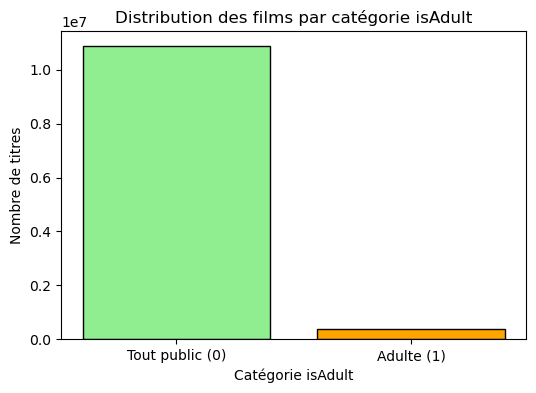

Proportions des catégories isAdult (%):
isAdult
False    96.785649
True      3.214351
Name: count, dtype: Float64


In [35]:
# 6. Étudier la distribution des colonnes

# Analyse et visualisation de isAdult
is_adult_counts = df_title_basics_copy['isAdult'].value_counts()

# Graphique en barres pour isAdult
plt.figure(figsize=(6, 4))
plt.bar(is_adult_counts.index, is_adult_counts.values, color=['lightgreen', 'orange'], edgecolor='black')
plt.xticks([0, 1], labels=['Tout public (0)', 'Adulte (1)'])
plt.xlabel('Catégorie isAdult')
plt.ylabel('Nombre de titres')
plt.title('Distribution des films par catégorie isAdult')
plt.show()

# Afficher les proportions
proportions = is_adult_counts / is_adult_counts.sum() * 100
print("Proportions des catégories isAdult (%):")
print(proportions)



In [ ]:
# 7. Vérifier la présence de doublons (NE MARCHE PAS AVEC LE FORMAT LISTE SUR LE GENRE, ça marche en utilisant le df avant reformatage de la colonne Genre)

duplicated_rows = df_title_basics[df_title_basics.duplicated()]
print(f"Nombre de doublons : {len(duplicated_rows)}")

Nombre de doublons : 0


In [ ]:
# 8. Explorer les relations entre les colonnes (PAS UTILE SUR NOTRE DATASET, car pas de données numériques, seulement dates et catégories)

# Corrélation entre variables numériques :

# correlation_matrix = df_title_basics_copy.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title("Matrice de corrélation")
# plt.show()

# Relations entre variables :

# sns.pairplot(df_title_basics_copy.select_dtypes(include=[np.number]))
# plt.show()

In [ ]:
# 9. Étudier les valeurs aberrantes (PAS UTILE SUR NOTRE DATASET, car pas de données numériques, seulement dates et catégories)

# for col in df_title_basics.df_title_basics_copy(include=[np.number]).columns:
#    sns.boxplot(x=df_title_basics_copy[col])
#    plt.title(f"Boîte à moustaches pour {col}")
#    plt.show()

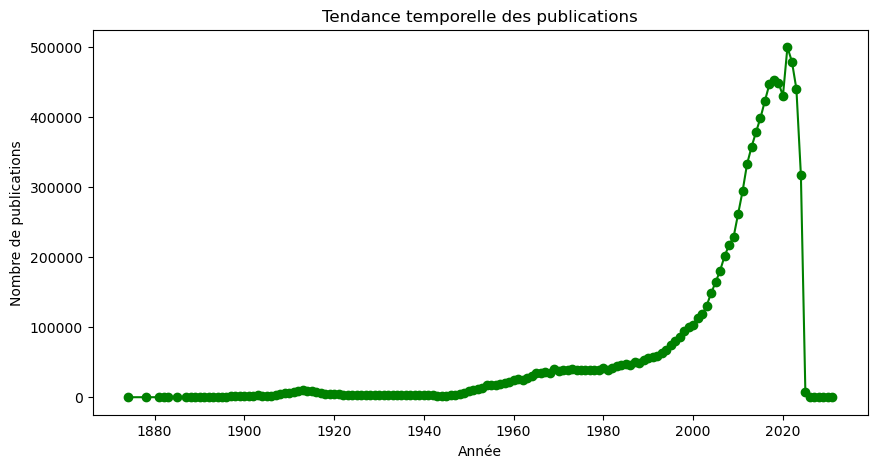

In [40]:
# 10. Explorer la distribution temporelle

# Analyse des séries temporelles

# Grouper par année et calculer le nombre d'occurrences
yearly_counts = df_title_basics_copy.groupby('startYear').size()

# Visualisation
yearly_counts.plot(kind='line', figsize=(10, 5), marker='o', color='green')
plt.title("Tendance temporelle des publications")
plt.xlabel("Année")
plt.ylabel("Nombre de publications")
plt.show()


    decade  film_count
0   1870.0          32
1   1880.0          79
2   1890.0        6080
3   1900.0       25762
4   1910.0       72552
5   1920.0       36950
6   1930.0       32655
7   1940.0       29349
8   1950.0      159490
9   1960.0      311617
10  1970.0      388484
11  1980.0      456860
12  1990.0      737310
13  2000.0     1606215
14  2010.0     3794551
15  2020.0     2173053
16  2030.0          12


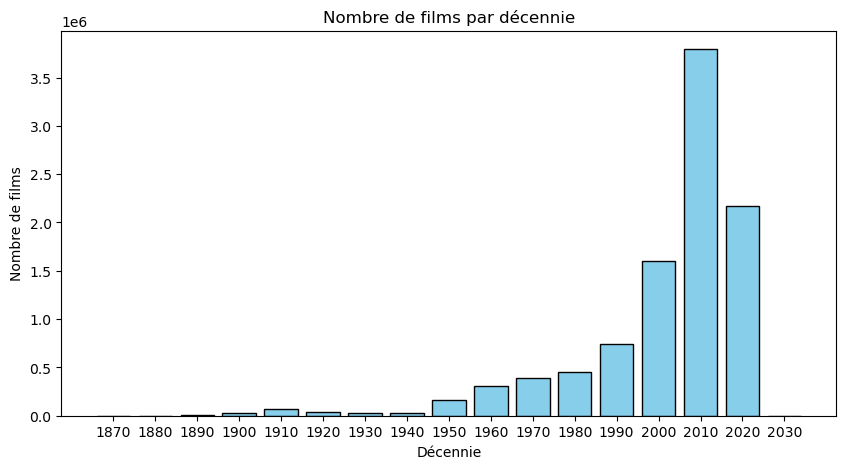

In [43]:
# Décennie = année - (année % 10)
df_title_basics_copy['decade'] = (df_title_basics_copy['startYear'] // 10) * 10

# Compter le nombre de films par décennie
films_per_decade = df_title_basics_copy.groupby('decade').size().reset_index(name='film_count')

# Afficher les résultats
print(films_per_decade)

# Visualiser
plt.figure(figsize=(10, 5))
plt.bar(films_per_decade['decade'], films_per_decade['film_count'], width=8, color='skyblue', edgecolor='black')
plt.xlabel('Décennie')
plt.ylabel('Nombre de films')
plt.title('Nombre de films par décennie')
plt.xticks(films_per_decade['decade'])
plt.show()

In [45]:
# Suppression des données non désirées (au delà des incohérence de format): 
df_title_basics_copy = df_title_basics_copy[df_title_basics_copy['isAdult'] == True]

In [46]:
# Exporter en CSV

df_title_basics_copy.to_csv('title_basics_traite.csv', index=False, encoding='utf-8')